In [3]:
import kagglehub
import pandas as pd
path = kagglehub.dataset_download("fedesoriano/company-bankruptcy-prediction")
data = pd.read_csv(path+"/data.csv")

/home/codespace/.python/current/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calcular matriz de correlación
corr_matrix = data.corr(method='pearson')  # También puedes usar 'spearman' o 'kendall'
target_corr = corr_matrix['Bankrupt?'].sort_values(ascending=False)

# Eliminar la autocorrelación de la variable consigo misma
target_corr = target_corr.drop('Bankrupt?')

In [6]:
target_corr.abs().sort_values(ascending=False).head()

Net Income to Total Assets                                 0.315457
ROA(A) before interest and % after tax                     0.282941
ROA(B) before interest and depreciation after tax          0.273051
ROA(C) before interest and depreciation before interest    0.260807
Net worth/Assets                                           0.250161
Name: Bankrupt?, dtype: float64

In [7]:
umbral = 0.20  # Puedes ajustar este valor según tu criterio
variables_determinantes_20 = target_corr[abs(target_corr) > umbral]
print("Variables más determinantes:")
print(variables_determinantes_20)

Variables más determinantes:
Debt ratio %                                               0.250161
Per Share Net profit before tax (Yuan ¥)                  -0.201395
Net profit before tax/Paid-in capital                     -0.207857
Retained Earnings to Total Assets                         -0.217779
Persistent EPS in the Last Four Seasons                   -0.219560
Net worth/Assets                                          -0.250161
ROA(C) before interest and depreciation before interest   -0.260807
ROA(B) before interest and depreciation after tax         -0.273051
ROA(A) before interest and % after tax                    -0.282941
Net Income to Total Assets                                -0.315457
Name: Bankrupt?, dtype: float64


In [8]:
umbral = 0.15  # Puedes ajustar este valor según tu criterio
variables_determinantes_15 = target_corr[abs(target_corr) > umbral]
print("Variables más determinantes:")
print(variables_determinantes_15)

Variables más determinantes:
Debt ratio %                                               0.250161
Current Liability to Assets                                0.194494
Borrowing dependency                                       0.176543
Current Liability to Current Assets                        0.171306
Liability to Equity                                        0.166812
Current Liabilities/Equity                                 0.153828
Current Liability to Equity                                0.153828
Net Value Per Share (C)                                   -0.164784
Net Value Per Share (B)                                   -0.165399
Net Value Per Share (A)                                   -0.165465
Net Income to Stockholder's Equity                        -0.180987
Working Capital to Total Assets                           -0.193083
Per Share Net profit before tax (Yuan ¥)                  -0.201395
Net profit before tax/Paid-in capital                     -0.207857
Retained Earnings t

In [9]:
#Checar correlación entre variables

umbral_correlacion = 0.15


# Seleccionar variables que superan el umbral (excluyendo la variable objetivo)
variables_determinantes = target_corr[abs(target_corr) > umbral_correlacion].index.tolist()


# Crear nuevo DataFrame con solo las variables determinantes + la variable objetivo
df_filtrado = data[variables_determinantes + ['Bankrupt?']].copy()



In [10]:
df_filtrado.head()

,Debt ratio %,Current Liability to Assets,Borrowing dependency,Current Liability to Current Assets,Liability to Equity,Current Liabilities/Equity,Current Liability to Equity,Net Value Per Share (C),Net Value Per Share (B),Net Value Per Share (A),...,Per Share Net profit before tax (Yuan ¥),Net profit before tax/Paid-in capital,Retained Earnings to Total Assets,Persistent EPS in the Last Four Seasons,Net worth/Assets,ROA(C) before interest and depreciation before interest,ROA(B) before interest and depreciation after tax,ROA(A) before interest and % after tax,Net Income to Total Assets,Bankrupt?
0,0.207576,0.147308,0.390284,0.118250,0.290202,0.339077,0.339077,0.147950,0.147950,0.147950,...,0.138736,0.137757,0.903225,0.169141,0.792424,0.370594,0.405750,0.424389,0.716845,1
1,0.171176,0.056963,0.376760,0.047775,0.283846,0.329740,0.329740,0.182251,0.182251,0.182251,...,0.169918,0.168962,0.931065,0.208944,0.828824,0.464291,0.516730,0.538214,0.795297,1
2,0.207516,0.098162,0.379093,0.025346,0.290189,0.334777,0.334777,0.193713,0.177911,0.177911,...,0.142803,0.148036,0.909903,0.180581,0.792484,0.426071,0.472295,0.499019,0.774670,1
3,0.151465,0.098715,0.379743,0.067250,0.281721,0.331509,0.331509,0.154187,0.154187,0.154187,...,0.148603,0.147561,0.906902,0.193722,0.848535,0.399844,0.457733,0.451265,0.739555,1
4,0.106509,0.110195,0.375025,0.047725,0.278514,0.330726,0.330726,0.167502,0.167502,0.167502,...,0.168412,0.167461,0.913850,0.212537,0.893491,0.465022,0.522298,0.538432,0.795016,1


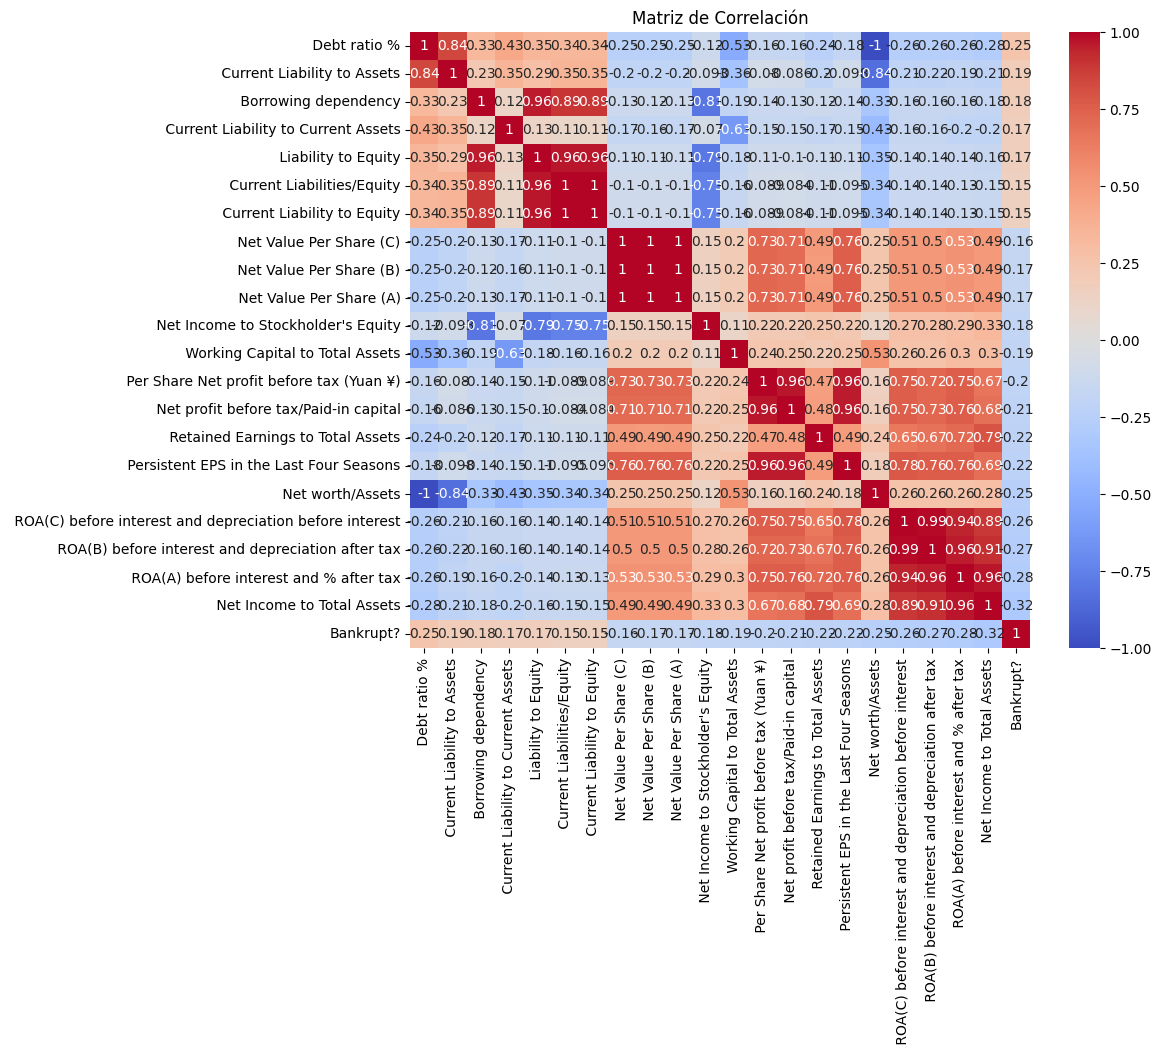

In [11]:
# Calcular matriz de correlación
corr_matrix = df_filtrado.corr(method='pearson')  # También puedes usar 'spearman' o 'kendall'

# Visualizar matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def seleccionar_variables(df, target_col, corr_threshold=0.7, vif_threshold=5):
    # Paso 1: Calcular correlaciones
    corr_matrix = df.corr()
    target_corr = corr_matrix[[target_col]].drop(target_col)
    
    # Paso 2: Calcular VIF
    vif_data = pd.DataFrame()
    vif_data["Variable"] = df.drop(columns=[target_col]).columns
    vif_data["VIF"] = [variance_inflation_factor(df.drop(columns=[target_col]).values, i) 
                       for i in range(len(df.drop(columns=[target_col]).columns))]
    vif_data = vif_data.set_index("Variable")
    
    # Paso 3: Identificar variables a eliminar
    to_remove = set()
    
    # Eliminar por VIF alto primero
    high_vif = vif_data[vif_data['VIF'] > vif_threshold].index.tolist()
    to_remove.update(high_vif)
    
    # Eliminar por alta correlación entre predictores
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (abs(corr_matrix.iloc[i, j]) > corr_threshold and 
                corr_matrix.columns[j] != target_col and 
                corr_matrix.columns[i] != target_col):
                
                # Conservar la que tiene mayor correlación con el objetivo
                corr_i = abs(target_corr.loc[corr_matrix.columns[i]].iloc[0])
                corr_j = abs(target_corr.loc[corr_matrix.columns[j]].iloc[0])
                
                if corr_i > corr_j:
                    to_remove.add(corr_matrix.columns[j])
                else:
                    to_remove.add(corr_matrix.columns[i])
    
    # Paso 4: Crear lista final de variables
    selected_vars = [col for col in df.columns if col not in to_remove]
    
    # Asegurarse de que la variable objetivo está incluida
    if target_col not in selected_vars:
        selected_vars.append(target_col)
    
    return sorted(selected_vars), sorted(to_remove)

# Ejecutar la función
selected, removed = seleccionar_variables(data, 'Bankrupt?')
print("\nVariables seleccionadas:", selected)
print("Variables eliminadas:", removed)

# Crear nuevo DataFrame



Variables seleccionadas: [' Accounts Receivable Turnover', ' Allocation rate per person', ' Average Collection Days', ' Cash Flow to Equity', ' Cash Flow to Total Assets', ' Cash Turnover Rate', ' Cash/Current Liability', ' Cash/Total Assets', ' Continuous Net Profit Growth Rate', ' Current Asset Turnover Rate', ' Current Liability to Current Assets', ' Current Ratio', ' Degree of Financial Leverage (DFL)', ' Equity to Liability', ' Fixed Assets Turnover Frequency', ' Fixed Assets to Assets', ' Interest Coverage Ratio (Interest expense to EBIT)', ' Interest Expense Ratio', ' Interest-bearing debt interest rate', ' Inventory Turnover Rate (times)', ' Inventory/Current Liability', ' Inventory/Working Capital', ' Liability-Assets Flag', ' Long-term Liability to Current Assets', ' Long-term fund suitability ratio (A)', ' Net Income Flag', ' Net Value Growth Rate', ' No-credit Interval', ' Operating Expense Rate', ' Operating Profit Growth Rate', ' Operating profit per person', ' Quick Ass

/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [13]:
df_selected =data[selected].copy()

In [14]:
df_selected.head()

,Accounts Receivable Turnover,Allocation rate per person,Average Collection Days,Cash Flow to Equity,Cash Flow to Total Assets,Cash Turnover Rate,Cash/Current Liability,Cash/Total Assets,Continuous Net Profit Growth Rate,Current Asset Turnover Rate,...,Revenue Per Share (Yuan ¥),Revenue per person,Tax rate (A),Total Asset Growth Rate,Total Asset Return Growth Rate Ratio,Total assets to GNP price,Total debt/Total net worth,Total expense/Assets,Total income/Total expense,Bankrupt?
0,0.001814,0.037135,0.003487,0.312905,0.637555,4.580000e+08,1.473360e-04,0.004094,0.217535,7.010000e+08,...,0.017560,0.034164,0.0,4.980000e+09,0.263100,0.009219,0.021266,0.064856,0.002022,1
1,0.001286,0.012335,0.004917,0.314163,0.641100,2.490000e+09,1.383910e-03,0.014948,0.217620,1.065198e-04,...,0.021144,0.006889,0.0,6.110000e+09,0.264516,0.008323,0.012502,0.025516,0.002226,1
2,0.001495,0.141016,0.004227,0.314515,0.642765,7.610000e+08,5.340000e+09,0.000991,0.217601,1.791094e-03,...,0.005944,0.028997,0.0,7.280000e+09,0.264184,0.040003,0.021248,0.021387,0.002060,1
3,0.001966,0.021320,0.003215,0.302382,0.579039,2.030000e+09,1.010646e-03,0.018851,0.217568,8.140000e+09,...,0.014368,0.015463,0.0,4.880000e+09,0.263371,0.003252,0.009572,0.024161,0.001831,1
4,0.001449,0.023988,0.004367,0.311567,0.622374,8.240000e+08,6.804636e-04,0.014161,0.217626,6.680000e+09,...,0.029690,0.058111,0.0,5.510000e+09,0.265218,0.003878,0.005150,0.026385,0.002224,1


In [ ]:
# Filtrar los primeros 400 registros con valor 0 y los primeros 200 registros con valor 1
df_0 = data[data["Bankrupt?"] == 0].head(400)
df_1 = data[data["Bankrupt?"] == 1].head(200)



# Concatenar ambos subconjuntos (manteniendo todas las columnas de 'data')
df_subset = pd.concat([df_0, df_1])

# Reiniciar el índice del DataFrame resultante
df_subset = df_subset.reset_index(drop=True)

# Verificar el nuevo DataFrame
print(df_subset)

     Bankrupt?   ROA(C) before interest and depreciation before interest  \
0            0                                           0.390923          
1            0                                           0.508361          
2            0                                           0.488519          
3            0                                           0.495686          
4            0                                           0.482475          
..         ...                                                ...          
595          1                                           0.388193          
596          1                                           0.467021          
597          1                                           0.437089          
598          1                                           0.449276          
599          1                                           0.299810          

      ROA(A) before interest and % after tax  \
0                                   0.4

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = pd.DataFrame(df_subset[[' Debt ratio %',
                       " Net Income to Stockholder's Equity",
                       ' Net Income to Total Assets',
                       ' Net Value Per Share (A)',
                       ' Persistent EPS in the Last Four Seasons']])
y = pd.Series(df_subset["Bankrupt?"])

# 2. Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Crear y entrenar el modelo
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

import numpy as np

def sigmoid(x):
    return [1 / (1 + np.exp(-y)) for y in x]

y_pred = sigmoid(y_pred)

y_pred_sort = {i:y_pred[i] for i in range(len(y_pred))}
y_pred_sort = dict(sorted(y_pred_sort.items(), key=lambda x: x[1], reverse=True))

how_many_ones = y_test.value_counts()[1]

one_predictions = list(y_pred_sort.keys())[:how_many_ones]

final_preds = [1 if x in one_predictions else 0 for x in range(len(y_pred))]

In [36]:

print(classification_report(y_test, final_preds))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       122
           1       0.79      0.79      0.79        58

    accuracy                           0.87       180
   macro avg       0.85      0.85      0.85       180
weighted avg       0.87      0.87      0.87       180



In [37]:
print(f"Exactitud (Accuracy): {accuracy_score(y_test, final_preds):.2f}")
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, final_preds))

Exactitud (Accuracy): 0.87

Matriz de confusión:
[[110  12]
 [ 12  46]]


In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report





# 2. Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Crear y entrenar el modelo
model = LogisticRegression(max_iter=1000, class_weight="balanced")  # Aumentamos max_iter para convergencia
model.fit(X_train, y_train)

# 4. Hacer predicciones
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilidades para la clase positiva

# 5. Evaluar el modelo
print(f"Exactitud (Accuracy): {accuracy_score(y_test, y_pred):.2f}")
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

Exactitud (Accuracy): 0.89

Matriz de confusión:
[[108  14]
 [  6  52]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       122
           1       0.79      0.90      0.84        58

    accuracy                           0.89       180
   macro avg       0.87      0.89      0.88       180
weighted avg       0.90      0.89      0.89       180



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 278, number of negative: 278
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000045 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 930
[LightGBM] [Info] Number of data points in the train set: 556, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

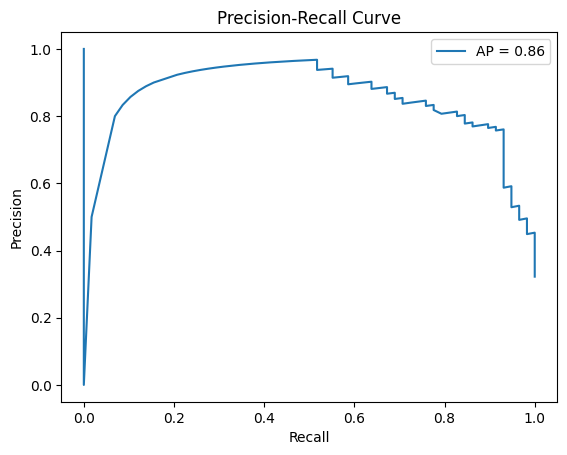


=== Weighted LightGBM ===
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       122
           1       0.79      0.90      0.84        58

    accuracy                           0.89       180
   macro avg       0.87      0.89      0.88       180
weighted avg       0.90      0.89      0.89       180



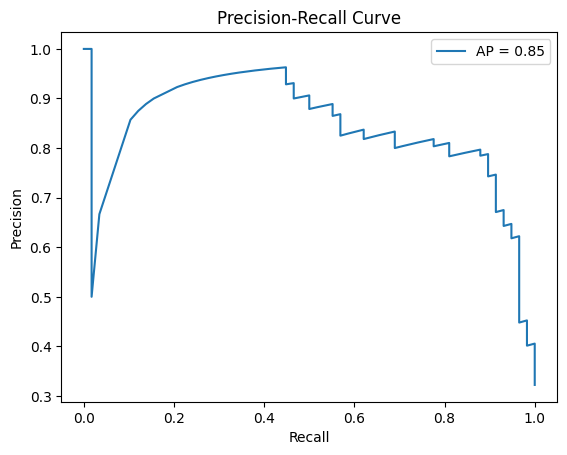

In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_recall_curve, average_precision_score
from imblearn.over_sampling import SMOTE
import lightgbm as lgb
import matplotlib.pyplot as plt





# --- Handling Imbalance ---
# Option 1: SMOTE (Oversample minority class)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Option 2: Class Weighting (Set scale_pos_weight)
# Calculate the ratio for scale_pos_weight
neg_count = np.sum(y_train == 0)
pos_count = np.sum(y_train == 1)
scale_pos_weight = neg_count / pos_count  # LightGBM's recommended weighting

# --- LightGBM Model ---
# With SMOTE
model_smote = lgb.LGBMClassifier(
    random_state=42,
    boosting_type='gbdt',
    n_estimators=100,
    learning_rate=0.05,
    scale_pos_weight=1  # Since we used SMOTE, weighting is optional
)
model_smote.fit(X_resampled, y_resampled)

# With Class Weighting (No SMOTE)
model_weighted = lgb.LGBMClassifier(
    random_state=42,
    boosting_type='gbdt',
    n_estimators=100,
    learning_rate=0.05,
    scale_pos_weight=scale_pos_weight  # Critical for imbalance
)
model_weighted.fit(X_train, y_train)

# --- Evaluation ---
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for PR curve

    print(classification_report(y_test, y_pred))
    
    # Precision-Recall Curve (Better than ROC for imbalance)
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    ap_score = average_precision_score(y_test, y_proba)
    
    plt.figure()
    plt.plot(recall, precision, label=f'AP = {ap_score:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

# Evaluate both models
print("=== SMOTE + LightGBM ===")
evaluate_model(model_smote, X_test, y_test)

print("\n=== Weighted LightGBM ===")
evaluate_model(model_weighted, X_test, y_test)

=== SMOTE + LightGBM ===
              precision    recall  f1-score   support

           0       0.95      0.87      0.91       122
           1       0.77      0.91      0.83        58

    accuracy                           0.88       180
   macro avg       0.86      0.89      0.87       180
weighted avg       0.89      0.88      0.89       180



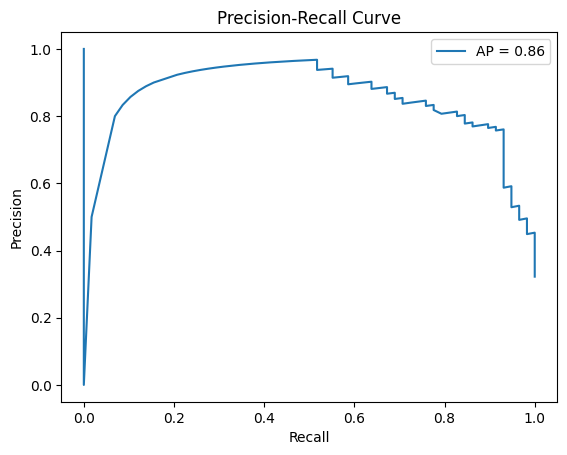

In [ ]:
# Evaluate both models
print("=== SMOTE + LightGBM ===")
evaluate_model(model_smote, X_test, y_test)

SVM

=== SMOTE + SVM ===
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.87      0.91       122
           1       0.76      0.90      0.83        58

    accuracy                           0.88       180
   macro avg       0.86      0.88      0.87       180
weighted avg       0.89      0.88      0.88       180

Confusion Matrix:
[[106  16]
 [  6  52]]


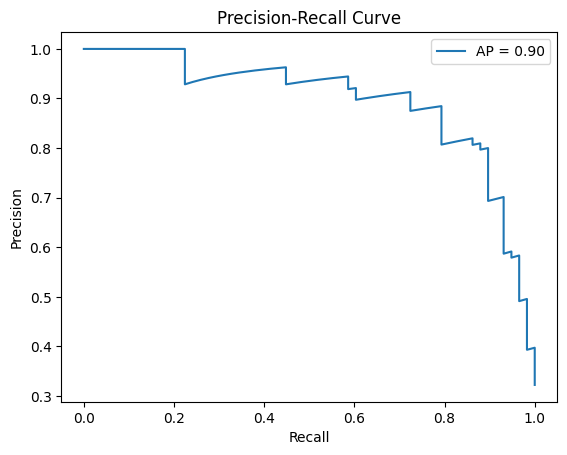


=== Weighted SVM ===
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.88      0.91       122
           1       0.78      0.90      0.83        58

    accuracy                           0.88       180
   macro avg       0.86      0.89      0.87       180
weighted avg       0.89      0.88      0.89       180

Confusion Matrix:
[[107  15]
 [  6  52]]


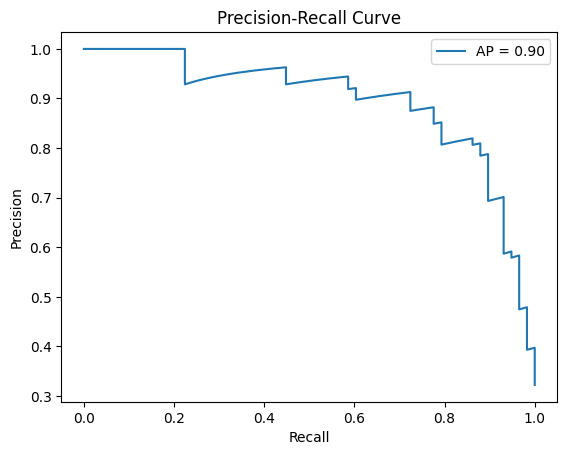

In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, precision_recall_curve, average_precision_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Sample Data (Replace with your dataset)
# X = features, y = labels (binary, with class imbalance)
# Example: y = [0, 0, 0, 1, 0, ...] where 1 is the minority class.
# X, y = ...  # Load your data here (e.g., pd.read_csv())

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- Handling Imbalance ---
# Option 1: SMOTE (Oversample minority class)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Option 2: Class Weighting (Set class_weight='balanced')
# Automatically adjusts weights inversely proportional to class frequencies

# --- SVM Model ---
# With SMOTE
svm_smote = SVC(
    kernel='rbf',  # Radial Basis Function (works well for most cases)
    C=1.0,         # Regularization parameter (tune this)
    gamma='scale', # Kernel coefficient (default='scale')
    probability=True,  # Required for predict_proba
    random_state=42
)
svm_smote.fit(X_resampled, y_resampled)

# With Class Weighting (No SMOTE)
svm_weighted = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    class_weight='balanced',  # Critical for imbalance
    probability=True,
    random_state=42
)
svm_weighted.fit(X_train, y_train)

# --- Evaluation ---
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for PR curve

    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    # Precision-Recall Curve (Better than ROC for imbalance)
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    ap_score = average_precision_score(y_test, y_proba)
    
    plt.figure()
    plt.plot(recall, precision, label=f'AP = {ap_score:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

# Evaluate both models
print("=== SMOTE + SVM ===")
evaluate_model(svm_smote, X_test, y_test)

print("\n=== Weighted SVM ===")
evaluate_model(svm_weighted, X_test, y_test)

=== SMOTE + Random Forest ===
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.87      0.91       122
           1       0.77      0.93      0.84        58

    accuracy                           0.89       180
   macro avg       0.87      0.90      0.88       180
weighted avg       0.90      0.89      0.89       180

Matriz de Confusión:
[[106  16]
 [  4  54]]


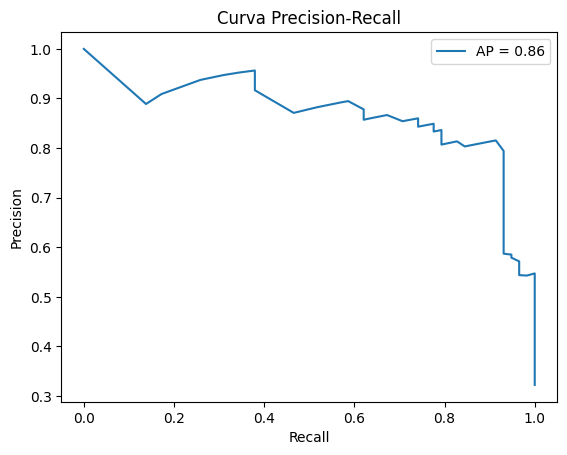


=== Random Forest con Pesos ===
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       122
           1       0.82      0.84      0.83        58

    accuracy                           0.89       180
   macro avg       0.87      0.88      0.87       180
weighted avg       0.89      0.89      0.89       180

Matriz de Confusión:
[[111  11]
 [  9  49]]


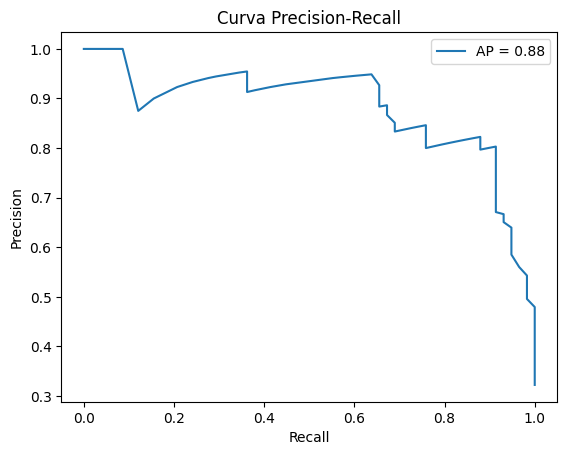

In [42]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, average_precision_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Cargar tus datos (reemplaza esto con tu dataset)
# X = features, y = etiquetas (binarias o multiclase, con desbalance)
# Ejemplo: y = [0, 0, 0, 1, 0, ...] donde 1 es la clase minoritaria
# X, y = pd.read_csv('tu_dataset.csv')['features'], pd.read_csv('tu_dataset.csv')['target']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- Manejo del Desbalance ---
# Opción 1: SMOTE (sobremuestreo de la clase minoritaria)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Opción 2: Peso de clases (class_weight='balanced' o manual)
# Calcular pesos manualmente (útil para multiclase)
class_weights = dict(zip(np.unique(y_train), len(y_train) / (len(np.unique(y_train)) * np.bincount(y_train))))

# --- Modelo Random Forest ---
# Con SMOTE
rf_smote = RandomForestClassifier(
    n_estimators=100,  # Número de árboles
    max_depth=None,     # Profundidad máxima (None para expandir hasta hojas puras)
    min_samples_split=2,
    class_weight=None,  # No necesario si usamos SMOTE
    random_state=42,
    n_jobs=-1          # Usar todos los núcleos del CPU
)
rf_smote.fit(X_resampled, y_resampled)

# Con pesos de clase (sin SMOTE)
rf_weighted = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    class_weight='balanced',  # Ajuste automático de pesos
    random_state=42,
    n_jobs=-1
)
rf_weighted.fit(X_train, y_train)

# --- Evaluación ---
def evaluar_modelo(modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)
    y_proba = modelo.predict_proba(X_test)[:, 1]  # Probabilidades para curva PR

    print("Reporte de Clasificación:")
    print(classification_report(y_test, y_pred))
    
    print("Matriz de Confusión:")
    print(confusion_matrix(y_test, y_pred))
    
    # Curva Precision-Recall (mejor que ROC para desbalance)
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    ap_score = average_precision_score(y_test, y_proba)
    
    plt.figure()
    plt.plot(recall, precision, label=f'AP = {ap_score:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Curva Precision-Recall')
    plt.legend()
    plt.show()

# Evaluar ambos modelos
print("=== SMOTE + Random Forest ===")
evaluar_modelo(rf_smote, X_test, y_test)

print("\n=== Random Forest con Pesos ===")
evaluar_modelo(rf_weighted, X_test, y_test)